In [15]:
import pandas as pd

In [16]:
df= pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [18]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
print(df["Extracurricular Activities"].unique())


['Yes' 'No']


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [22]:


from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Convert "Yes" to 1 and "No" to 0
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])

# Verify the conversion
print(df["Extracurricular Activities"].dtype)  # Should print int64


int64


In [23]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [32]:
# Split the features (X) and the target (y)
x= df.iloc[:, :-1].values  # All columns except the last one (Performance Index)
y = df.iloc[:, -1].values  # Last column (Performance Index)


In [33]:
# x[0:5]
y[0:5]

array([91., 65., 45., 36., 66.])

In [34]:
import matplotlib.pyplot as plt


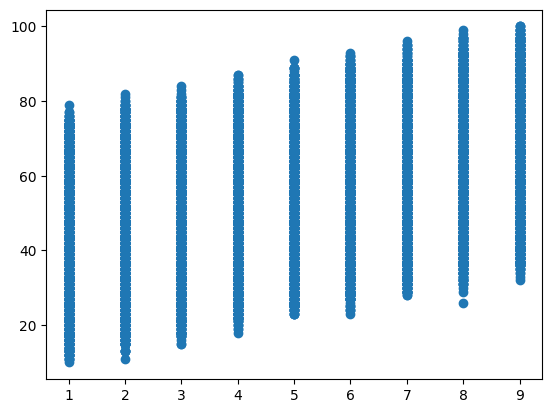

In [38]:


plt.scatter(X.iloc[:, 0], y)


In [40]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_test.shape


(2000, 5)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
# Using the first 3 rows (features)
first_three_data = df.iloc[:3, :-1].values  # First three rows, excluding 'Performance Index'


In [45]:
y_pred=model.predict(x_test)
y_pred

array([50.45128503, 53.09379171, 78.24502652, ..., 64.56863194,
       25.89718776, 18.82598463])

In [46]:
error = y_pred - y_test
error

array([-2.54871497,  3.09379171, -1.75497348, ..., -1.43136806,
       -1.10281224, -2.17401537])

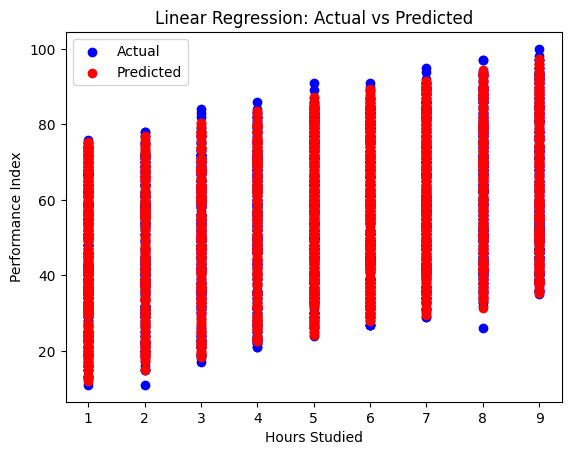

In [56]:

# Visualizing the actual vs predicted values using scatter plot
plt.scatter(x_test[:, 0], y_test, color='blue', label='Actual')  # Actual values
plt.scatter(x_test[:, 0], y_pred, color='red', label='Predicted')  # Predicted values

# Adding labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Display the plot
plt.show()


In [57]:
from sklearn.metrics import r2_score 
r2 =r2_score(y_test, y_pred)
r2

0.9880686410711422